In [2]:
import os
os.getcwd()

'd:\\vscode_machineLearning\\MLOps\\mlflow_learn\\model_serving'

In [3]:
os.chdir(r'd:\\vscode_machineLearning\\MLOps')

In [4]:
from mlflow_learn.model_serving.src.collect_data import load_data 
from mlflow_learn.model_serving.src.data_preprocessing import preprocessing , train_test_split_data
from mlflow_learn.model_serving.src.evaluate_model import ( get_metrics , 
                                                           create_confusion_matrix_plot ,
                                                             create_roc_auc_plot)
from mlflow_learn.model_serving.src.train_model import training_basic_classifier
from mlflow_learn.model_serving.src.mlflow import ModelRegistry

In [5]:
df = load_data(r'banking.csv')

In [6]:
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44,blue-collar,married,basic.4y,unknown,yes,no,cellular,aug,thu,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0
1,53,technician,married,unknown,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,0
2,28,management,single,university.degree,no,yes,no,cellular,jun,thu,...,3,6,2,success,-1.7,94.055,-39.8,0.729,4991.6,1
3,39,services,married,high.school,no,no,no,cellular,apr,fri,...,2,999,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,0
4,55,retired,married,basic.4y,no,yes,no,cellular,aug,fri,...,1,3,1,success,-2.9,92.201,-31.4,0.869,5076.2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,59,retired,married,high.school,unknown,no,yes,telephone,jun,thu,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.866,5228.1,0
41184,31,housemaid,married,basic.4y,unknown,no,no,telephone,may,thu,...,2,999,0,nonexistent,1.1,93.994,-36.4,4.860,5191.0,0
41185,42,admin.,single,university.degree,unknown,yes,yes,telephone,may,wed,...,3,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
41186,48,technician,married,professional.course,no,no,yes,telephone,oct,tue,...,2,999,0,nonexistent,-3.4,92.431,-26.9,0.742,5017.5,0


In [7]:
df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp_var_rate      0
cons_price_idx    0
cons_conf_idx     0
euribor3m         0
nr_employed       0
y                 0
dtype: int64

In [8]:
cleaned_data = preprocessing(data=df)

In [9]:
cleaned_data

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,...,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexisten_______________t,poutcome_nonexistent,poutcome_success
0,44,210,1,999,0,1.4,93.444,-36.1,4.963,5228.1,...,False,False,False,True,False,False,False,False,True,False
1,53,138,1,999,0,-0.1,93.200,-42.0,4.021,5195.8,...,False,True,False,False,False,False,False,False,True,False
2,28,339,3,6,2,-1.7,94.055,-39.8,0.729,4991.6,...,False,False,False,True,False,False,False,False,False,True
3,39,185,2,999,0,-1.8,93.075,-47.1,1.405,5099.1,...,False,True,False,False,False,False,False,False,True,False
4,55,137,1,3,1,-2.9,92.201,-31.4,0.869,5076.2,...,False,True,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,59,222,1,999,0,1.4,94.465,-41.8,4.866,5228.1,...,False,False,False,True,False,False,False,False,True,False
41184,31,196,2,999,0,1.1,93.994,-36.4,4.860,5191.0,...,False,False,False,True,False,False,False,False,True,False
41185,42,62,3,999,0,1.1,93.994,-36.4,4.857,5191.0,...,False,False,False,False,False,True,False,False,True,False
41186,48,200,2,999,0,-3.4,92.431,-26.9,0.742,5017.5,...,False,False,False,False,True,False,False,False,True,False


In [10]:
X_train, X_test, y_train, y_test = train_test_split_data(final_data=cleaned_data)

In [11]:
X_train

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,...,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexisten_______________t,poutcome_nonexistent,poutcome_success
32558,29,467,1,999,0,1.4,93.444,-36.1,4.964,5228.1,...,False,False,False,False,False,True,False,False,True,False
28932,32,112,8,999,0,1.4,93.918,-42.7,4.963,5228.1,...,False,False,False,False,False,True,False,False,True,False
8846,19,205,1,999,1,-1.8,93.075,-47.1,1.405,5099.1,...,False,False,True,False,False,False,True,False,False,False
11375,52,127,4,999,1,-0.1,93.200,-42.0,4.191,5195.8,...,False,False,True,False,False,False,True,False,False,False
14916,41,190,8,999,0,-1.8,92.893,-46.2,1.244,5099.1,...,False,False,True,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3072,42,204,1,999,0,1.4,93.918,-42.7,4.962,5228.1,...,False,False,False,True,False,False,False,False,True,False
39897,29,138,2,999,1,-1.8,92.893,-46.2,1.250,5099.1,...,False,True,False,False,False,False,True,False,False,False
2368,53,366,8,999,0,-0.1,93.200,-42.0,4.021,5195.8,...,False,True,False,False,False,False,False,False,True,False
27718,57,91,1,999,0,1.4,93.444,-36.1,4.970,5228.1,...,False,False,True,False,False,False,False,False,True,False


In [12]:
y_train

,y
32558,1
28932,0
8846,1
11375,0
14916,0
...,...
3072,0
39897,0
2368,0
27718,0


In [13]:
model = training_basic_classifier(X_train,y_train)

d:\vscode_machineLearning\MLOps\mlflow_learn\model_serving\src\train_model.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y_train)


In [ ]:
model

RandomForestClassifier(n_estimators=101)

## metrics

In [ ]:
y_pred = model.predict(X_test)
y_pred_prob = model.predict_proba(X_test)

In [ ]:
metrics = get_metrics(y_test,y_pred,y_pred_prob)

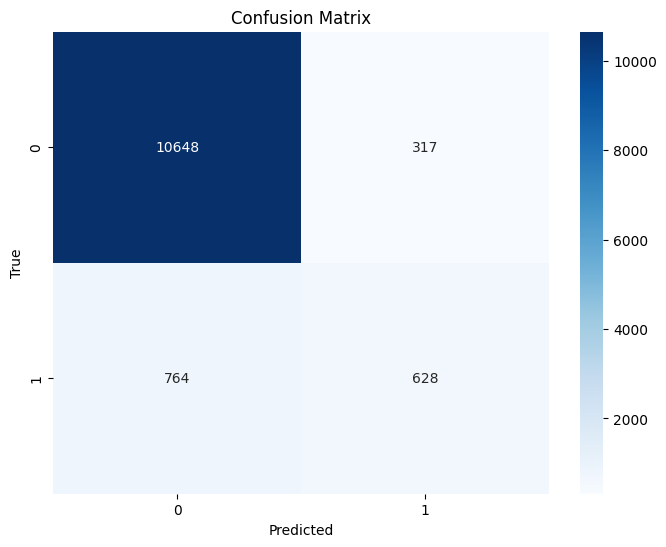

In [ ]:
create_confusion_matrix_plot(model,X_test,y_test)

**Prefer to run it from command line**

`mlflow ui` This will launch mlflow UI in the browser and you can access it using `localhost:5000` but this uses file as backend to store experiments and model artifacts. It does not support model registry functionality. 

To use model registry, you need to have some backend database other than the file system. Ex mysql, sqlite or any other DB mentioned in mlflow docs under backend storage. Refer: https://www.mlflow.org/docs/latest/tracking.html?highlight=scenario#how-runs-and-artifacts-are-recorded

#### In this tutorial , we will use sqlite as backend, so Now run this command to start mlflow with backend.
`mlflow server --backend-store-uri sqlite:///mlflow.db --default-artifact-root ./artifacts --host 0.0.0.0 --port 5000`

In [ ]:
registry = ModelRegistry(experiment_name='learning-model-registry',run_name='run')

In [ ]:
registry.create_exp_and_register_model(experiment_name = 'model-serving',run_name='run', run_metrics =metrics,model = model, confusion_matrix_path = 'artifacts/confusion_matrix.png', 
                        roc_auc_plot_path = 'artifacts/roc_auc_curve.png', run_params=None)